# 2.1 DFT of real and complex signals, and a trumpet sound  

# 2.1.a Signals

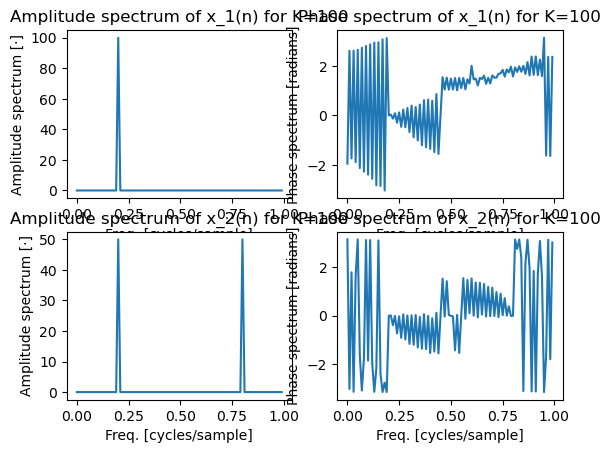

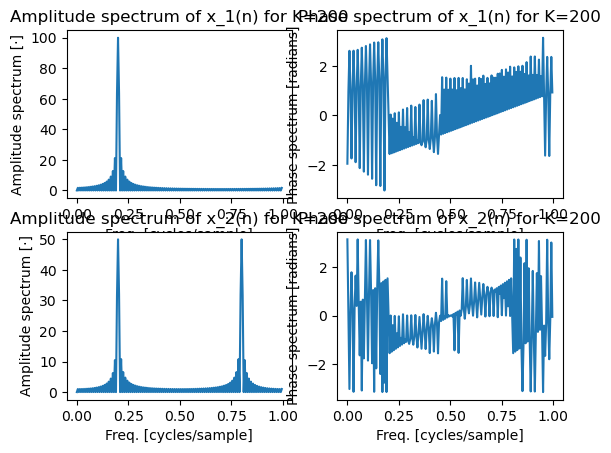

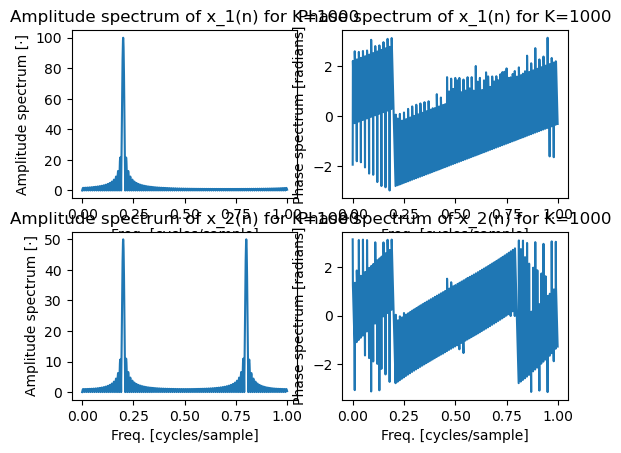

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nData = 100
n = np.arange(nData)
freq = 2 * np.pi * 0.2  # rad/sample
x1 = np.exp(1j * freq * n)
x2 = np.cos(freq * n)

# Compute the DFTs
nDftList = [100, 200, 1000]  # the DFT-length
dftListLength = len(nDftList)
for ii in range(dftListLength):
    dftX1 = np.fft.fft(x1, nDftList[ii])
    dftX2 = np.fft.fft(x2, nDftList[ii])

    # Plot the amplitude spectra
    freqVector = np.arange(nDftList[ii]) / nDftList[ii]  # cycles/sample
    plt.figure(ii)
    plt.subplot(2, 2, 1)
    plt.plot(freqVector, np.abs(dftX1))
    plt.title(f'Amplitude spectrum of x_1(n) for K={nDftList[ii]}')
    plt.xlabel('Freq. [cycles/sample]')
    plt.ylabel('Amplitude spectrum [\u22C5]')
    plt.subplot(2, 2, 2)
    plt.plot(freqVector, np.angle(dftX1))
    plt.title(f'Phase spectrum of x_1(n) for K={nDftList[ii]}')
    plt.xlabel('Freq. [cycles/sample]')
    plt.ylabel('Phase spectrum [radians]')
    plt.subplot(2, 2, 3)
    plt.title(f'Amplitude spectrum of x_2(n) for K={nDftList[ii]}')
    plt.plot(freqVector, np.abs(dftX2))
    plt.xlabel('Freq. [cycles/sample]')
    plt.ylabel('Amplitude spectrum [\u22C5]')
    plt.subplot(2, 2, 4)
    plt.plot(freqVector, np.angle(dftX2))
    plt.title(f'Phase spectrum of x_2(n) for K={nDftList[ii]}')
    plt.xlabel('Freq. [cycles/sample]')
    plt.ylabel('Phase spectrum [radians]')

plt.show()


## b) DFT of a trumpet signal (same as in SPIS03.ipynb)

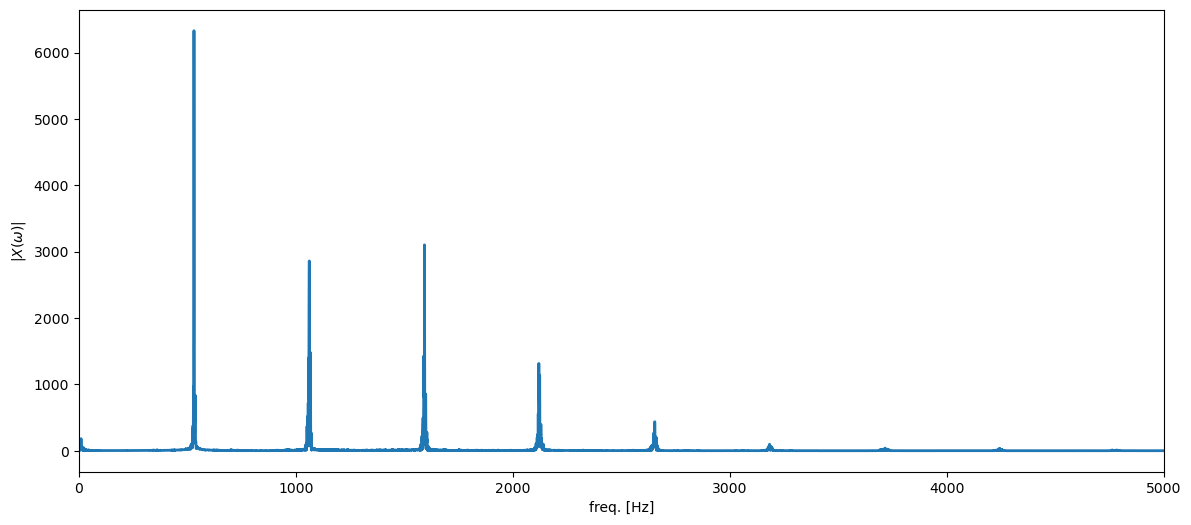

In [3]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

# load a trumpet signal
samplingFreq, cleanTrumpetSignal = wave.read('../data/trumpet.wav')
cleanTrumpetSignal = cleanTrumpetSignal/2**15 # normalise
ipd.Audio(cleanTrumpetSignal, rate=samplingFreq)

nData = np.size(cleanTrumpetSignal)
timeVector = np.arange(nData)/samplingFreq # seconds
freqVector = np.arange(nData)*samplingFreq/nData # Hz
# we compute the DFT using an FFT algorithm
freqResponseClean = np.fft.fft(cleanTrumpetSignal)
ampSpectrumClean = np.abs(freqResponseClean)
plt.figure(figsize=(14,6))
plt.plot(freqVector,ampSpectrumClean,linewidth=2)
plt.xlim((0,5000))
plt.xlabel('freq. [Hz]'), plt.ylabel('$|X(\omega)|$');

The amplitude spectrum of the trumpet signal contains only a few harmonics.
Therefore a harmonic summation model is a good model for the trumpet signal.

# 2 Convolution in time and frequency domains

% TODO Check this, buggy

In [10]:
nData = 10
n = np.arange(nData)
freq = 1.1  # rad/sample
a = -0.9
h = a**n
x = np.cos(freq*n)
convLength = 2*nData-1
hzp = np.concatenate((h, np.zeros(convLength-nData)))
xzp = np.concatenate((x, np.zeros(convLength-nData)))

# a) compute convolution as a sum
ya = np.convolve(xzp, hzp, mode='full')

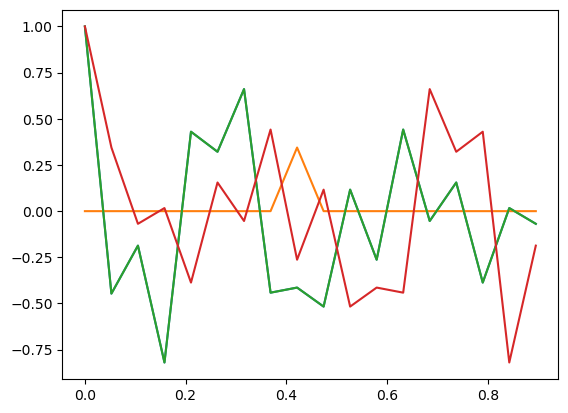

In [11]:
# b) compute the convolution using linear algebra
H = np.roll(np.fliplr(np.diag(hzp)), -1, axis=0)[:-1, :]
yb = H @ xzp

# c) compute the convolution in the frequency domain
yc = np.real(np.fft.ifft(np.fft.fft(h, convLength) * np.fft.fft(x, convLength)))

# d) compute the convolution using the DFT matrix
F = np.fft.fft(np.eye(convLength))
yd = np.real((1/convLength) * F.T @ np.diag(F @ hzp) @ F @ xzp)

# plot the four results on top of each other - they should be the same
timeVector = np.arange(convLength) / convLength

# Assuming ya, yb, yc, yd are numpy arrays
min_length = min(ya.size, yb.size, yc.size, yd.size)

ya = ya[:min_length]
yb = yb[:min_length]
yc = yc[:min_length]
yd = yd[:min_length]
timeVector = timeVector[:min_length] 
plt.plot(timeVector, np.column_stack((ya, yb, yc, yd)))
plt.show()
